<a href="https://colab.research.google.com/github/AcerPing/NTUT_FinancialBigData/blob/main/%E5%9C%8B%E7%AB%8B%E8%87%BA%E5%8C%97%E7%A7%91%E6%8A%80%E5%A4%A7%E5%AD%B8_%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A_%E4%BD%9C%E6%A5%AD5_%E9%9B%86%E7%BE%A4%E5%88%86%E6%9E%90(20230526).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#_____________________________importing required libraries for dataframe(df) & Visuvalization________________________________#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#_______________________________importing libraries that are reqiuired for clustering________________________________________#
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#____________________________importing warnings to avoid unneccessary information___________________________________________#
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('OnlineRetail.csv', encoding= 'cp1252' , header=0)
if df.shape[0] != 541898: raise Exception
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,10002,INFLATABLE POLITICAL GLOBE,48,01-12-2010 08:45,0.85,12583.0,France
1,536382,10002,INFLATABLE POLITICAL GLOBE,12,01-12-2010 09:45,0.85,16098.0,United Kingdom
2,536756,10002,INFLATABLE POLITICAL GLOBE,1,02-12-2010 14:23,0.85,NaN,United Kingdom
3,536863,10002,INFLATABLE POLITICAL GLOBE,1,03-12-2010 11:19,0.85,17967.0,United Kingdom
4,536865,10002,INFLATABLE POLITICAL GLOBE,5,03-12-2010 11:28,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541893,C572347,S,SAMPLES,-1,24-10-2011 11:03,33.05,NaN,United Kingdom
541894,572849,S,SAMPLES,1,26-10-2011 12:20,33.05,NaN,United Kingdom
541895,C577330,S,SAMPLES,-1,18-11-2011 14:16,2.89,NaN,United Kingdom
541896,C577330,S,SAMPLES,-1,18-11-2011 14:16,75.00,NaN,United Kingdom


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(406818, 8)

In [ ]:
# Changing the datatype of Customer Id as per Business understanding

df['CustomerID'] = df['CustomerID'].astype(str)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,10002,INFLATABLE POLITICAL GLOBE,48,01-12-2010 08:45,0.85,12583.0,France
1,536382,10002,INFLATABLE POLITICAL GLOBE,12,01-12-2010 09:45,0.85,16098.0,United Kingdom
3,536863,10002,INFLATABLE POLITICAL GLOBE,1,03-12-2010 11:19,0.85,17967.0,United Kingdom
6,537047,10002,INFLATABLE POLITICAL GLOBE,1,05-12-2010 11:02,0.85,13069.0,United Kingdom
7,537227,10002,INFLATABLE POLITICAL GLOBE,24,06-12-2010 08:42,0.85,17677.0,United Kingdom
...,...,...,...,...,...,...,...,...
541830,581493,POST,POSTAGE,1,09-12-2011 10:10,15.00,12423.0,Belgium
541831,581494,POST,POSTAGE,2,09-12-2011 10:13,18.00,12518.0,Germany
541832,581570,POST,POSTAGE,1,09-12-2011 11:59,18.00,12662.0,Germany
541833,581574,POST,POSTAGE,2,09-12-2011 12:09,18.00,12526.0,Germany


In [ ]:
# df.to_csv('OnlineRetailExcel.csv')

<H2>依顧客的角度(CustomerID)

In [ ]:
# New Attribute : Amount:
df['Amount'] = df['Quantity']*df['UnitPrice']
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536370,10002,INFLATABLE POLITICAL GLOBE,48,01-12-2010 08:45,0.85,12583.0,France,40.80
1,536382,10002,INFLATABLE POLITICAL GLOBE,12,01-12-2010 09:45,0.85,16098.0,United Kingdom,10.20
3,536863,10002,INFLATABLE POLITICAL GLOBE,1,03-12-2010 11:19,0.85,17967.0,United Kingdom,0.85
6,537047,10002,INFLATABLE POLITICAL GLOBE,1,05-12-2010 11:02,0.85,13069.0,United Kingdom,0.85
7,537227,10002,INFLATABLE POLITICAL GLOBE,24,06-12-2010 08:42,0.85,17677.0,United Kingdom,20.40
...,...,...,...,...,...,...,...,...,...
541830,581493,POST,POSTAGE,1,09-12-2011 10:10,15.00,12423.0,Belgium,15.00
541831,581494,POST,POSTAGE,2,09-12-2011 10:13,18.00,12518.0,Germany,36.00
541832,581570,POST,POSTAGE,1,09-12-2011 11:59,18.00,12662.0,Germany,18.00
541833,581574,POST,POSTAGE,2,09-12-2011 12:09,18.00,12526.0,Germany,36.00


In [ ]:
# New Attribute : Frequency
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
# rfm_f.head()
rfm_f

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [ ]:
# New Attribute : Recency

# Convert to datetime to proper datatype

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [ ]:
# # Compute the maximum date to know the last transaction date

# max_date = max(df['InvoiceDate'])
# max_date

In [ ]:
# max_date = max(df['InvoiceDate'])
from datetime import datetime
max_date = datetime.today().strftime('%Y-%m-%d %H:%M:%S')
max_date = pd.to_datetime(max_date)
max_date

Timestamp('2023-05-10 13:23:02')

In [ ]:
# Compute the difference between max date and transaction date

df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France,40.80,4543 days 04:38:02
1,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098.0,United Kingdom,10.20,4543 days 03:38:02
3,536863,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-03 11:19:00,0.85,17967.0,United Kingdom,0.85,4541 days 02:04:02
6,537047,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-05 11:02:00,0.85,13069.0,United Kingdom,0.85,4539 days 02:21:02
7,537227,10002,INFLATABLE POLITICAL GLOBE,24,2010-12-06 08:42:00,0.85,17677.0,United Kingdom,20.40,4538 days 04:41:02


In [ ]:
# Compute last transaction date to get the recency of customers

rfm_p = df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,4495 days 03:06:02
1,12347.0,4171 days 21:31:02
2,12348.0,4245 days 00:10:02
3,12349.0,4188 days 03:32:02
4,12350.0,4479 days 21:22:02


In [ ]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,4495
1,12347.0,4171
2,12348.0,4245
3,12349.0,4188
4,12350.0,4479


In [ ]:
# Merging the two dfs
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [ ]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,4495
1,12347.0,4310.00,182,4171
2,12348.0,1797.24,31,4245
3,12349.0,1757.55,73,4188
4,12350.0,334.40,17,4479
...,...,...,...,...
4367,18280.0,180.60,10,4447
4368,18281.0,80.82,7,4350
4369,18282.0,176.60,13,4177
4370,18283.0,2094.88,756,4173


 Silhouette Score

In [ ]:
# df = pd.read_csv('OnlineRetailNormalization.csv', encoding= 'cp1252' , header=0)
# df

In [ ]:
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt
# %matplotlib inline
# scores = []
# ks = []
# for i in range(2,11):
#   clu = KMeans(n_clusters = i)
#   clu.fit(df)
#   clu_score = silhouette_score(df, clu.labels_)
#   scores.append(clu_score)
#   ks.append(i)
# print("分數:", scores)
# print("K 值:", ks)
# plt.plot(scores, ks)

In [ ]:
# pd.DataFrame({'K值':ks,
#        'Silhouette Score分數':scores},)

In [ ]:
# scores.sort(reverse=True)
# scores

<H2>依產品的角度(StockCode)

In [ ]:
# Changing the datatype of StockCode as per Business understanding

df['StockCode'] = df['StockCode'].astype(str)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France,40.80,4543 days 04:38:02
1,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098.0,United Kingdom,10.20,4543 days 03:38:02
3,536863,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-03 11:19:00,0.85,17967.0,United Kingdom,0.85,4541 days 02:04:02
6,537047,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-05 11:02:00,0.85,13069.0,United Kingdom,0.85,4539 days 02:21:02
7,537227,10002,INFLATABLE POLITICAL GLOBE,24,2010-12-06 08:42:00,0.85,17677.0,United Kingdom,20.40,4538 days 04:41:02
...,...,...,...,...,...,...,...,...,...,...
541830,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.00,12423.0,Belgium,15.00,4170 days 03:13:02
541831,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518.0,Germany,36.00,4170 days 03:10:02
541832,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany,18.00,4170 days 01:24:02
541833,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany,36.00,4170 days 01:14:02


In [ ]:
rfm_m = df.groupby('StockCode')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m
     

,StockCode,Amount
0,10002,699.550
1,10080,114.410
2,10120,40.530
3,10123C,3.250
4,10124A,6.720
...,...,...
3679,D,-5668.720
3680,DOT,11906.360
3681,M,-58385.460
3682,PADS,0.003


In [ ]:
# New Attribute : Frequency
rfm_f = df.groupby('StockCode')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['StockCode', 'Frequency']
# rfm_f.head()
rfm_f

,StockCode,Frequency
0,10002,49
1,10080,21
2,10120,30
3,10123C,3
4,10124A,5
...,...,...
3679,D,76
3680,DOT,16
3681,M,465
3682,PADS,4


In [ ]:
# Compute last transaction date to get the recency of customers
rfm_p = df.groupby('StockCode')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p['Diff'] = rfm_p['Diff'].dt.days # Extract number of days only
rfm_p     

,StockCode,Diff
0,10002,4405
1,10080,4187
2,10120,4175
3,10123C,4423
4,10124A,4203
...,...,...
3679,D,4178
3680,DOT,4173
3681,M,4170
3682,PADS,4244


In [ ]:
# Merging the two dfs
rfm = pd.merge(rfm_m, rfm_f, on='StockCode', how='inner')
rfm

,StockCode,Amount,Frequency
0,10002,699.550,49
1,10080,114.410,21
2,10120,40.530,30
3,10123C,3.250,3
4,10124A,6.720,5
...,...,...,...
3679,D,-5668.720,76
3680,DOT,11906.360,16
3681,M,-58385.460,465
3682,PADS,0.003,4


In [ ]:
# Merge tha dataframes to get the final RFM dataframe
rfm = pd.merge(rfm, rfm_p, on='StockCode', how='inner')
rfm.columns = ['StockCode', 'Amount', 'Frequency', 'Recency']
rfm

,StockCode,Amount,Frequency,Recency
0,10002,699.550,49,4405
1,10080,114.410,21,4187
2,10120,40.530,30,4175
3,10123C,3.250,3,4423
4,10124A,6.720,5,4203
...,...,...,...,...
3679,D,-5668.720,76,4178
3680,DOT,11906.360,16,4173
3681,M,-58385.460,465,4170
3682,PADS,0.003,4,4244


Silhouette Score

In [ ]:
# df = pd.read_csv('OnlineRetailNormalization.csv', encoding= 'cp1252' , header=0)
# df

,Recency,Frequency,Money
0,0.630027,0.023144,0.308932
1,0.048257,0.009643,0.305872
2,0.013405,0.013983,0.305486
3,0.678284,0.000964,0.305291
4,0.088472,0.001929,0.305309
...,...,...,...
3679,0.021448,0.036162,0.275635
3680,0.010724,0.007232,0.367528
3681,0.000000,0.223722,0.000000
3682,0.201072,0.001446,0.305274


分數: [0.7828829773912616, 0.7036467090013083, 0.6317572255548618, 0.6386730895403102, 0.552996287194508, 0.5701044368901812, 0.50292394696501, 0.5377566393047203, 0.49937367308638253]
K 值: [2, 3, 4, 5, 6, 7, 8, 9, 10]


Text(0, 0.5, 'Number of K')

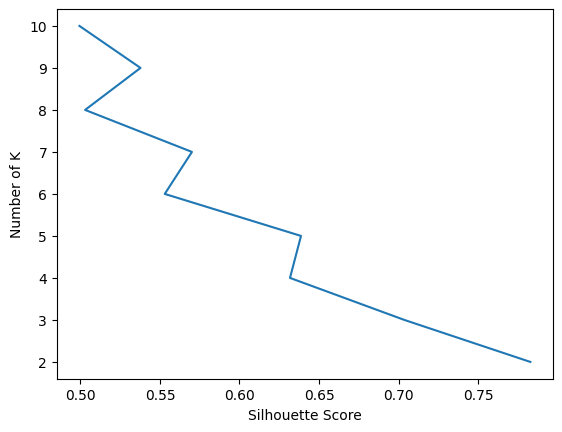

In [ ]:
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt
# %matplotlib inline
# scores = []
# ks = []
# for i in range(2,11):
#   clu = KMeans(n_clusters = i)
#   clu.fit(df)
#   clu_score = silhouette_score(df, clu.labels_)
#   scores.append(clu_score)
#   ks.append(i)
# print("分數:", scores)
# print("K 值:", ks)
# plt.plot(scores, ks)
# plt.xlabel('Silhouette Score')
# plt.ylabel('Number of K')

In [ ]:
# pd.DataFrame({'K值':ks,
#        'Silhouette Score分數':scores})

,K值,Silhouette Score分數
0,2,0.782883
1,3,0.703647
2,4,0.631757
3,5,0.638673
4,6,0.552996
5,7,0.570104
6,8,0.502924
7,9,0.537757
8,10,0.499374
